In [1]:
import os
import re
from nltk.tokenize import sent_tokenize
from scipy.signal import decimate
from tdmh import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
ana = SentimentIntensityAnalyzer()
import sklearn
from sklearn.preprocessing import minmax_scale
from scipy.fftpack import dct, idct
import pandas as pd
from math import ceil
import stanza
import numpy as np

#import stanza
#stanza.download('en') # download English model
#nlp = stanza.Pipeline('en') # initialize English neural pipeline

import seaborn as sns
import matplotlib.pyplot as plt

nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma')

2022-07-31 15:41:19 WARNING: Can not find mwt: default from official model list. Ignoring it.
2022-07-31 15:41:19 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |

2022-07-31 15:41:19 INFO: Use device: cpu
2022-07-31 15:41:19 INFO: Loading: tokenize
2022-07-31 15:41:19 INFO: Loading: pos
2022-07-31 15:41:19 INFO: Loading: lemma
2022-07-31 15:41:19 INFO: Done loading processors!


In [2]:
def get_text_as_string(path):
    with open(path , encoding = 'utf-8') as text_file:
        full_text = text_file.read()
        full_text = re.sub( '\s+' , ' ' , full_text)
        return full_text
    
full_text = get_text_as_string( 'Corpus/PictureOfDorianGray.txt' )
#print(full_text)

In [3]:
def get_sentences(full_text):
    sentences = sent_tokenize(full_text.strip())
    return sentences

sentences = get_sentences(full_text)
print( len(sentences) )
print( sentences[0:3] )

4374
['\ufeffThe Project Gutenberg EBook of The Picture of Dorian Gray, by Oscar Wilde This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.', 'You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: The Picture of Dorian Gray 13 chapter version Author: Oscar Wilde Posting Date: February 9, 2013 [EBook #4078] Release Date: May, 2003 First Posted: November 12, 2001 Last Updated: January 29, 2005 Language: English *** START OF THIS PROJECT GUTENBERG EBOOK THE PICTURE OF DORIAN GRAY *** Produced by Alfred J. Drake.', 'HTML version by Al Haines.']


In [4]:
lemmatised_sentences = []
for i,s in enumerate(sentences):
    
    print(i/len(sentences))
    
    doc = nlp(s)
    for sent in doc.sentences:
        new_sentence = ''
        for word in sent.words:
            new_sentence += f'{word.lemma} '
        lemmatised_sentences.append(new_sentence)

        

0.0
0.00022862368541380886
0.0004572473708276177
0.0006858710562414266
0.0009144947416552355
0.0011431184270690445
0.0013717421124828531
0.001600365797896662
0.001828989483310471
0.00205761316872428
0.002286236854138089
0.002514860539551898
0.0027434842249657062
0.002972107910379515
0.003200731595793324
0.003429355281207133
0.003657978966620942
0.0038866026520347507
0.00411522633744856
0.004343850022862369
0.004572473708276178
0.004801097393689987
0.005029721079103796
0.005258344764517604
0.0054869684499314125
0.005715592135345221
0.00594421582075903
0.006172839506172839
0.006401463191586648
0.006630086877000457
0.006858710562414266
0.007087334247828075
0.007315957933241884
0.0075445816186556925
0.007773205304069501
0.00800182898948331
0.00823045267489712
0.008459076360310928
0.008687700045724738
0.008916323731138546
0.009144947416552356
0.009373571101966164
0.009602194787379973
0.009830818472793781
0.010059442158207591
0.0102880658436214
0.010516689529035207
0.010745313214449017
0.010

0.09373571101966163
0.09396433470507544
0.09419295839048926
0.09442158207590307
0.09465020576131687
0.09487882944673068
0.09510745313214448
0.0953360768175583
0.09556470050297211
0.09579332418838592
0.09602194787379972
0.09625057155921353
0.09647919524462735
0.09670781893004116
0.09693644261545496
0.09716506630086877
0.09739368998628258
0.09762231367169638
0.0978509373571102
0.09807956104252401
0.09830818472793781
0.09853680841335162
0.09876543209876543
0.09899405578417925
0.09922267946959305
0.09945130315500686
0.09967992684042067
0.09990855052583447
0.10013717421124829
0.1003657978966621
0.1005944215820759
0.10082304526748971
0.10105166895290352
0.10128029263831732
0.10150891632373114
0.10173754000914495
0.10196616369455876
0.10219478737997256
0.10242341106538637
0.10265203475080019
0.102880658436214
0.1031092821216278
0.10333790580704161
0.10356652949245541
0.10379515317786922
0.10402377686328304
0.10425240054869685
0.10448102423411065
0.10470964791952446
0.10493827160493827
0.10516

0.18884316415180613
0.18907178783721992
0.18930041152263374
0.18952903520804756
0.18975765889346136
0.18998628257887518
0.19021490626428897
0.1904435299497028
0.1906721536351166
0.1909007773205304
0.19112940100594422
0.19135802469135801
0.19158664837677183
0.19181527206218565
0.19204389574759945
0.19227251943301327
0.19250114311842706
0.19272976680384088
0.1929583904892547
0.1931870141746685
0.1934156378600823
0.1936442615454961
0.19387288523090992
0.19410150891632372
0.19433013260173754
0.19455875628715136
0.19478737997256515
0.19501600365797897
0.19524462734339276
0.19547325102880658
0.1957018747142204
0.1959304983996342
0.19615912208504802
0.1963877457704618
0.19661636945587563
0.19684499314128945
0.19707361682670324
0.19730224051211706
0.19753086419753085
0.19775948788294467
0.1979881115683585
0.19821673525377229
0.1984453589391861
0.1986739826245999
0.19890260631001372
0.19913122999542754
0.19935985368084133
0.19958847736625515
0.19981710105166894
0.20004572473708276
0.20027434842

0.28532235939643347
0.2855509830818473
0.2857796067672611
0.28600823045267487
0.2862368541380887
0.2864654778235025
0.28669410150891633
0.28692272519433015
0.2871513488797439
0.28737997256515774
0.28760859625057156
0.2878372199359854
0.2880658436213992
0.28829446730681296
0.2885230909922268
0.2887517146776406
0.2889803383630544
0.28920896204846824
0.289437585733882
0.28966620941929583
0.28989483310470965
0.29012345679012347
0.2903520804755373
0.29058070416095105
0.2908093278463649
0.2910379515317787
0.2912665752171925
0.29149519890260633
0.2917238225880201
0.2919524462734339
0.29218106995884774
0.29240969364426156
0.2926383173296754
0.29286694101508914
0.29309556470050296
0.2933241883859168
0.2935528120713306
0.2937814357567444
0.2940100594421582
0.294238683127572
0.29446730681298583
0.29469593049839965
0.29492455418381347
0.29515317786922723
0.29538180155464105
0.2956104252400549
0.2958390489254687
0.29606767261088246
0.2962962962962963
0.2965249199817101
0.2967535436671239
0.29698216

0.3820301783264746
0.38225880201188844
0.38248742569730226
0.38271604938271603
0.38294467306812985
0.38317329675354367
0.3834019204389575
0.3836305441243713
0.3838591678097851
0.3840877914951989
0.3843164151806127
0.38454503886602653
0.38477366255144035
0.3850022862368541
0.38523090992226794
0.38545953360768176
0.3856881572930956
0.3859167809785094
0.38614540466392316
0.386374028349337
0.3866026520347508
0.3868312757201646
0.38705989940557844
0.3872885230909922
0.38751714677640603
0.38774577046181985
0.38797439414723367
0.38820301783264743
0.38843164151806125
0.3886602652034751
0.3888888888888889
0.3891175125743027
0.3893461362597165
0.3895747599451303
0.3898033836305441
0.39003200731595794
0.39026063100137176
0.3904892546867855
0.39071787837219935
0.39094650205761317
0.391175125743027
0.3914037494284408
0.39163237311385457
0.3918609967992684
0.3920896204846822
0.39231824417009603
0.39254686785550985
0.3927754915409236
0.39300411522633744
0.39323273891175126
0.3934613625971651
0.393689

0.479652491998171
0.4798811156835848
0.48010973936899864
0.4803383630544124
0.48056698673982623
0.48079561042524005
0.48102423411065387
0.4812528577960677
0.48148148148148145
0.4817101051668953
0.4819387288523091
0.4821673525377229
0.48239597622313674
0.4826245999085505
0.4828532235939643
0.48308184727937814
0.48331047096479196
0.4835390946502058
0.48376771833561955
0.48399634202103337
0.4842249657064472
0.484453589391861
0.4846822130772748
0.4849108367626886
0.4851394604481024
0.48536808413351623
0.48559670781893005
0.48582533150434387
0.48605395518975764
0.48628257887517146
0.4865112025605853
0.4867398262459991
0.4869684499314129
0.4871970736168267
0.4874256973022405
0.4876543209876543
0.48788294467306814
0.48811156835848196
0.4883401920438957
0.48856881572930955
0.48879743941472337
0.4890260631001372
0.489254686785551
0.48948331047096477
0.4897119341563786
0.4899405578417924
0.49016918152720623
0.49039780521262005
0.4906264288980338
0.49085505258344764
0.49108367626886146
0.49131229

0.578875171467764
0.5791037951531779
0.5793324188385917
0.5795610425240055
0.5797896662094193
0.5800182898948331
0.5802469135802469
0.5804755372656607
0.5807041609510746
0.5809327846364883
0.5811614083219021
0.581390032007316
0.5816186556927297
0.5818472793781436
0.5820759030635574
0.5823045267489712
0.582533150434385
0.5827617741197988
0.5829903978052127
0.5832190214906264
0.5834476451760402
0.5836762688614541
0.5839048925468678
0.5841335162322817
0.5843621399176955
0.5845907636031092
0.5848193872885231
0.5850480109739369
0.5852766346593508
0.5855052583447645
0.5857338820301783
0.5859625057155922
0.5861911294010059
0.5864197530864198
0.5866483767718336
0.5868770004572473
0.5871056241426612
0.587334247828075
0.5875628715134888
0.5877914951989026
0.5880201188843164
0.5882487425697303
0.588477366255144
0.5887059899405579
0.5889346136259717
0.5891632373113854
0.5893918609967993
0.5896204846822131
0.5898491083676269
0.5900777320530407
0.5903063557384545
0.5905349794238683
0.590763603109282

0.6785550983081847
0.6787837219935985
0.6790123456790124
0.6792409693644261
0.67946959304984
0.6796982167352538
0.6799268404206675
0.6801554641060814
0.6803840877914952
0.680612711476909
0.6808413351623228
0.6810699588477366
0.6812985825331505
0.6815272062185642
0.6817558299039781
0.6819844535893919
0.6822130772748056
0.6824417009602195
0.6826703246456333
0.6828989483310471
0.6831275720164609
0.6833561957018747
0.6835848193872885
0.6838134430727023
0.6840420667581162
0.68427069044353
0.6844993141289437
0.6847279378143576
0.6849565614997714
0.6851851851851852
0.685413808870599
0.6856424325560128
0.6858710562414266
0.6860996799268404
0.6863283036122543
0.686556927297668
0.6867855509830818
0.6870141746684957
0.6872427983539094
0.6874714220393233
0.6877000457247371
0.6879286694101509
0.6881572930955647
0.6883859167809785
0.6886145404663924
0.6888431641518061
0.6890717878372199
0.6893004115226338
0.6895290352080475
0.6897576588934614
0.6899862825788752
0.6902149062642889
0.6904435299497028


0.7780064014631916
0.7782350251486054
0.7784636488340192
0.778692272519433
0.7789208962048468
0.7791495198902606
0.7793781435756745
0.7796067672610882
0.779835390946502
0.7800640146319159
0.7802926383173296
0.7805212620027435
0.7807498856881573
0.780978509373571
0.7812071330589849
0.7814357567443987
0.7816643804298126
0.7818930041152263
0.7821216278006401
0.782350251486054
0.7825788751714677
0.7828074988568816
0.7830361225422954
0.7832647462277091
0.783493369913123
0.7837219935985368
0.7839506172839507
0.7841792409693644
0.7844078646547782
0.7846364883401921
0.7848651120256058
0.7850937357110197
0.7853223593964335
0.7855509830818472
0.7857796067672611
0.7860082304526749
0.7862368541380887
0.7864654778235025
0.7866941015089163
0.7869227251943302
0.7871513488797439
0.7873799725651578
0.7876085962505716
0.7878372199359853
0.7880658436213992
0.788294467306813
0.7885230909922268
0.7887517146776406
0.7889803383630544
0.7892089620484682
0.789437585733882
0.7896662094192959
0.7898948331047096


0.8783721993598537
0.8786008230452675
0.8788294467306813
0.8790580704160951
0.879286694101509
0.8795153177869227
0.8797439414723366
0.8799725651577504
0.8802011888431641
0.880429812528578
0.8806584362139918
0.8808870598994056
0.8811156835848194
0.8813443072702332
0.881572930955647
0.8818015546410608
0.8820301783264746
0.8822588020118884
0.8824874256973022
0.8827160493827161
0.8829446730681298
0.8831732967535436
0.8834019204389575
0.8836305441243713
0.8838591678097851
0.8840877914951989
0.8843164151806127
0.8845450388660265
0.8847736625514403
0.8850022862368542
0.8852309099222679
0.8854595336076817
0.8856881572930956
0.8859167809785093
0.8861454046639232
0.886374028349337
0.8866026520347507
0.8868312757201646
0.8870598994055784
0.8872885230909923
0.887517146776406
0.8877457704618198
0.8879743941472337
0.8882030178326474
0.8884316415180613
0.8886602652034751
0.8888888888888888
0.8891175125743027
0.8893461362597165
0.8895747599451304
0.8898033836305441
0.8900320073159579
0.890260631001371

0.9778235025148605
0.9780521262002744
0.9782807498856881
0.978509373571102
0.9787379972565158
0.9789666209419295
0.9791952446273434
0.9794238683127572
0.9796524919981711
0.9798811156835848
0.9801097393689986
0.9803383630544125
0.9805669867398262
0.9807956104252401
0.9810242341106539
0.9812528577960676
0.9814814814814815
0.9817101051668953
0.9819387288523092
0.9821673525377229
0.9823959762231367
0.9826245999085506
0.9828532235939643
0.9830818472793782
0.983310470964792
0.9835390946502057
0.9837677183356196
0.9839963420210334
0.9842249657064472
0.984453589391861
0.9846822130772748
0.9849108367626886
0.9851394604481024
0.9853680841335163
0.98559670781893
0.9858253315043438
0.9860539551897577
0.9862825788751715
0.9865112025605853
0.9867398262459991
0.9869684499314129
0.9871970736168267
0.9874256973022405
0.9876543209876543
0.9878829446730681
0.9881115683584819
0.9883401920438958
0.9885688157293095
0.9887974394147233
0.9890260631001372
0.989254686785551
0.9894833104709648
0.9897119341563786

In [5]:
def get_sentiment( sentences ):
    all_scores = []
    if len(sentences)>0:
        for s in sentences:
            scores = ana.polarity_scores(s)
            all_scores.append( scores['compound'] )
    return all_scores

scores = get_sentiment(sentences)

In [6]:
lexicon = pd.read_csv('syuzhet_lexicon.csv')
lexicon_terms = dict()
for i,row in lexicon.iterrows():
    lexicon_terms[ row['x'] ] = row['y']
    

def get_sentiment2( sentences ):
    all_scores = []
    if len(sentences)>0:
        for s in sentences:
            sentence_score = 0 
            words = word_tokenize(s)
            for w in words:
                sentence_score += lexicon_terms.get(w,0)
            all_scores.append( sentence_score / len(words) )
    return all_scores

scores = get_sentiment2(sentences)
print(scores)

[0.0, 0.006060606060606061, 0.0, 0.003846153846153846, 0.018699186991869916, -0.06111111111111111, 0.04154929577464789, 0.10147058823529412, 0.0035714285714285718, 0.052083333333333336, 0.0, -0.05555555555555555, 0.0, 0.007142857142857143, 0.0, 0.034375, 0.0, 0.15, 0.12, -0.03571428571428571, 0.1590909090909091, 0.0, -0.034482758620689655, 0.018571428571428572, 0.022727272727272728, 0.0, 0.05333333333333334, 0.025, 0.0, -0.0018867924528301883, 0.075, 0.13846153846153847, -0.03333333333333333, -0.023809523809523808, 0.0625, -0.041666666666666664, 0.0, 0.0, 0.03125, 0.0608695652173913, 0.0, 0.017105263157894738, 0.04411764705882353, 0.1111111111111111, 0.0625, 0.21666666666666667, 0.0, -0.05, 0.14285714285714285, 0.010000000000000002, 0.06666666666666667, -0.08928571428571429, -0.025, 0.03235294117647059, -0.0625, -0.09642857142857143, 0.028125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.011111111111111108, 0.10714285714285714, 0.059375000000000004, 0.06818181818181818, -0

In [7]:
max_score = max(scores)
print(max_score)

for i,s in enumerate(scores):
    if s == max_score:
        print( sentences[i] )
    

0.3333333333333333
charming!"


## Plotting

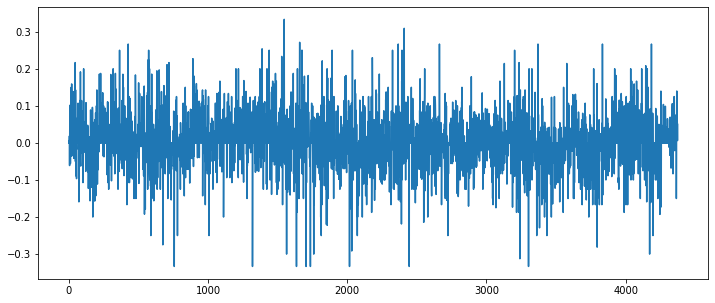

In [8]:
novel_time = range( 0, len(scores))
plt.figure( figsize=(12,5) )
sns.lineplot( x = novel_time , y = scores )
plt.show()

In [9]:
print(len(novel_time))

4374


In [10]:
#df_temperature['SMA_10'] = df_temperature.average_temperature.rolling(10, min_periods=1).mean()


In [11]:
def rolling_average(scores):
    all_averages = []
    window_size = math.ceil( 0.10 * len(scores) )
    start_index = 0
    end_index = window_size
    
    #print( f'{start_index}:{end_index}' )    
    subset = scores[start_index:end_index]
    avg = sum(subset)/len(subset)
    all_averages.append(avg)
    #print(len(subset))
    
    while end_index < len(scores):
        
        start_index += 1
        end_index = (start_index + window_size)
        if end_index > len(scores):
            end_index = len(scores)
            
        #print( f'{start_index}:{end_index}' )
            
        subset = scores[start_index:end_index]
        
        #print(len(subset))
        avg = sum(subset)/len(subset)
        all_averages.append(avg)
    return all_averages
        
      
ra = rolling_average(scores)
print(len(ra))


3937


In [12]:

window_size = math.ceil( 0.10 * len(scores) )
print(window_size)

i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array t o
#consider every window of size 3
while i < len(scores) - window_size + 1:
  
    # Calculate the average of current window
    window_average = round(np.sum(scores[
      i:i+window_size]) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
  
print(moving_averages)

438
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,

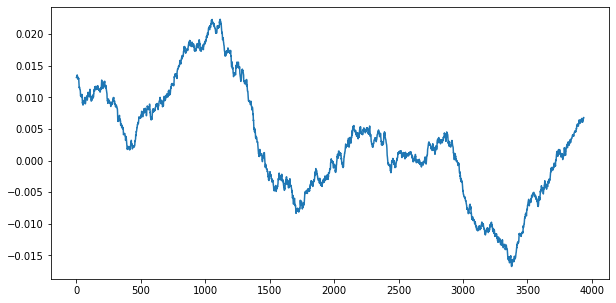

In [13]:
scores_plot = ra
novel_time = range( 1, len(scores_plot)+1)
plt.figure( figsize=(10,5) )
ax = sns.lineplot( x = novel_time , y = scores_plot )
#ax.set_xticks(novel_time)
plt.show()

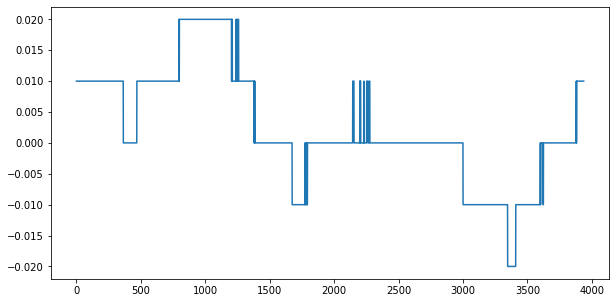

In [14]:
scores_plot = moving_averages
novel_time = range( 1, len(scores_plot)+1)
plt.figure( figsize=(10,5) )
ax = sns.lineplot( x = novel_time , y = scores_plot )
#ax.set_xticks(novel_time)
plt.show()

In [15]:
print(moving_averages)

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0

In [16]:
print (len(moving_averages))
x = ceil(len(moving_averages)/100)
ra_dec = decimate(moving_averages,x)
#print(ra_dec)
new_list = []

for i in range(0,len(moving_averages)+1):
    if i % x == 0:
        new_list.append(moving_averages[i])
        
print(len(new_list))
print(new_list)

3937
99
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.01, -0.01, -0.01, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.02, -0.02, -0.01, -0.01, -0.01, -0.01, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01]


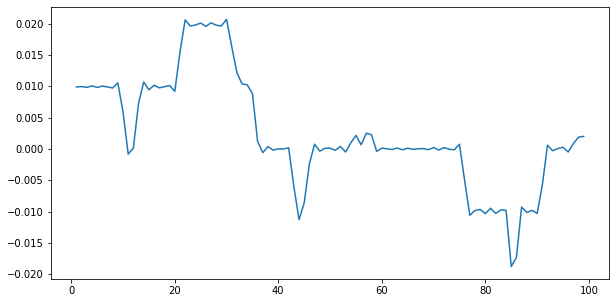

In [17]:
scores_plot = ra_dec
novel_time = range( 1, len(scores_plot)+1)
plt.figure( figsize=(10,5) )
ax = sns.lineplot( x = novel_time , y = scores_plot )
#ax.set_xticks(novel_time)
plt.show()